In [1]:
import numpy as np
from PIL import Image
from pathlib import Path
from skimage import io
import matplotlib.pyplot as plt
from skimage.io import imread
from tifffile import imwrite, imsave
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100

In [2]:
#This simple function finds the position of the maximum of a hyperspectral image
def maxima_coordinate(filename):
    """Find the maxima of a hyperspectral image along the 0 axis """
    image = io.imread(filename)
    print(image.shape)
    maxima_image = np.argmax(image,axis=0)
    return maxima_image

#finds the average intensity pixelwise at different slices of an image 
def preedge_postedge_diff(filename,preedge_pos:int):
    """Find the difference between five frames before preedge_pos and the final frames"""
    image = io.imread(filename)
    bottom = np.mean(image[(preedge_pos-5):preedge_pos,:,:],axis=0)
    top = np.mean(image[-5:,:,:],axis=0)
    return top-bottom

    


(151, 1024, 1024)


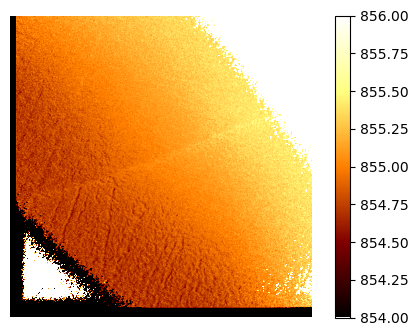

In [3]:
ni_45L = "/Users/apple/Sync/Research/maxPEEM - Ni-22Cr/3rd_oxidation_45L/45L-adjusted-Ni2p XAS 845-875 step0p2-1.tif"

#find the maxima positions across the iamge for the Ni at the final oxidation state and plot it 
maxima_image = maxima_coordinate(ni_45L)
maxima_image = maxima_image.astype(float)
maxima_image = (maxima_image/151)*(875-845)+845
#plt.imsave('ni_45L_maxima_image.png',maxima_image)
plt.imshow(maxima_image,cmap="afmhot",vmin=854,vmax=856)
plt.axis('off')
plt.clim(854,856)
plt.colorbar()

(101, 512, 512)


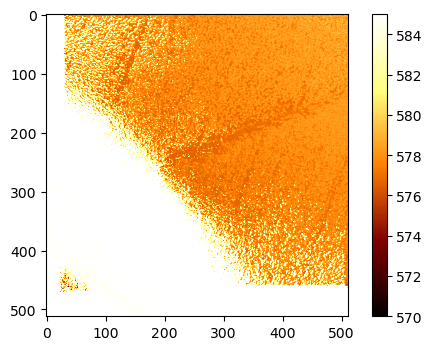

In [4]:
#This cell finds the maximum of each pixel spectrum of Cr- not super informative since the maxima depends on oxide state
cr_45L = "/Users/apple/Sync/Research/maxPEEM - Ni-22Cr/3rd_oxidation_45L/45L-adjusted-Cr XAS 570-595 step0p2.tif"
maxima_image = maxima_coordinate(cr_45L)
maxima_image = maxima_image.astype(float)
maxima_image = (maxima_image/101)*(590-570)+570
#plt.imsave('ni_45L_maxima_image.png',maxima_image)
plt.imshow(maxima_image,cmap="afmhot",vmax=585)
#plt.axis('off')
#plt.clim(572,576)
plt.colorbar()


583.8613861386139


Text(0.5, 1.0, 'Jump between frames 72 and 73')

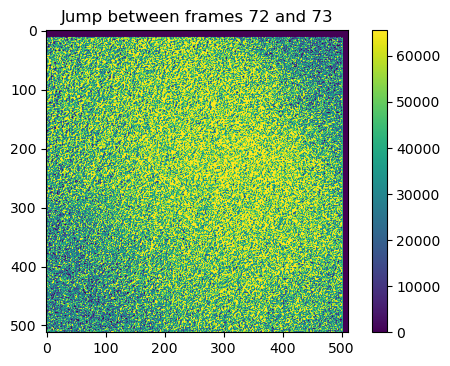

In [5]:
#There is a focusing artifact/jump between frames 70 and 71 of the Cr xas hyperspectral image at 65L
#This cell visualizes that jump, showing it's got a weird spatial distribution, and shows that all other frames have random noise between them
cr_45L_img = io.imread(cr_45L)
print(70/101*20+570)
jump_img = cr_45L_img[72,:,:]-cr_45L_img[73,:,:]
plt.imshow(jump_img)
plt.colorbar()
plt.title("Jump between frames 72 and 73")


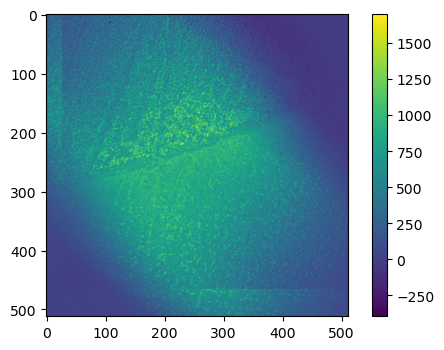

In [6]:
#This cell looks at the difference in linear background height across the image for Cr
cr_lin_background = preedge_postedge_diff(cr_45L,20)
plt.imshow(cr_lin_background)
plt.colorbar()